In [158]:
# last block is run first

def spike_counter(Vy, tmax):
    spikes = 0
    counter = 0
    for d in Vy[:,0]:
        if (counter<((len (Vy[:,0])-2))):
            counter+=1
        if (d < Vy[counter,0] and d > 0 and Vy[counter,0] > Vy[counter+1,0]):
            spikes+=1
    return spikes/tmax*1000

print (spike_counter(Vy, tmax))

186.0


In [159]:
I=0
spikerate = []

for i in range(20):
    I+=5
    Vy = odeint(compute_derivatives, Y, T)
    spikerate.append(spike_counter(Vy, tmax))
print (spikerate)

[0.0, 40.0, 90.66666666666667, 129.33333333333331, 160.0, 186.0, 208.0, 226.66666666666666, 244.66666666666666, 259.33333333333337, 273.3333333333333, 286.6666666666667, 299.3333333333333, 311.33333333333337, 322.66666666666663, 333.3333333333333, 344.6666666666667, 353.3333333333333, 363.3333333333333, 372.66666666666663]


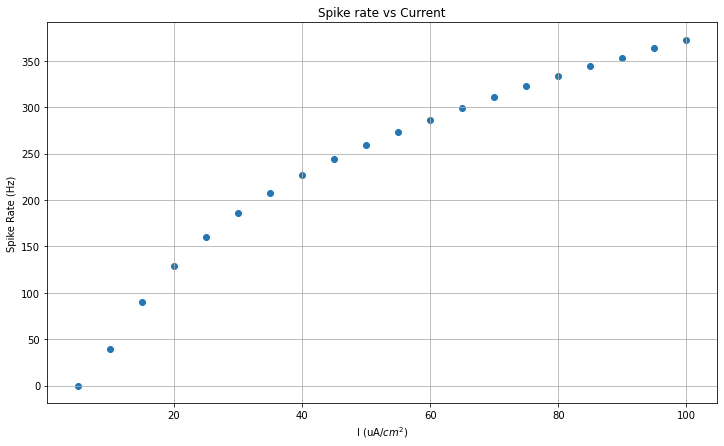

In [160]:
# Input stimulus
#1, Figure 13 reproduced

Ilist = []
I=0

for i in range(20):
    I+=5
    Ilist.append(I)

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(Ilist, spikerate)
ax.set_xlabel(r'I (uA/$cm^2$)')
ax.set_ylabel('Spike Rate (Hz)')
ax.set_title('Spike rate vs Current')
plt.grid()


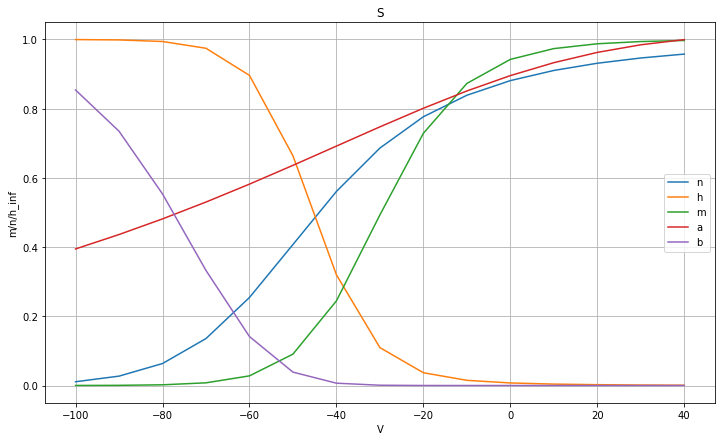

In [148]:
# Checking values

nlist = []
hlist = []
mlist = []
alist = []
blist = []
Vlist = []

V=-100

for i in range(15):
    
    nlist.append(n_inf(V))
    hlist.append(h_inf(V))
    mlist.append(m_inf(V))
    alist.append(a_inf(V))
    blist.append(b_inf(V))
    Vlist.append(V)
    V+=10
    
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(Vlist, nlist, label="n")
ax.plot(Vlist, hlist, label="h")
ax.plot(Vlist, mlist, label="m")
ax.plot(Vlist, alist, label="a")
ax.plot(Vlist, blist, label="b")
ax.set_xlabel(r'V')
ax.set_ylabel('m/n/h_inf')
ax.set_title('S')
ax.legend()
plt.grid()

In [157]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import odeint

# Start and end time (in milliseconds)
tmin = 0.0
tmax = 1500.0

# Average delayed-potassium channel conductance per unit area (mS/cm^2)
gK = 20.0

# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Average Transient-potassium channel conductance per unit area (mS/cm^2)
gA = 47.7

# Membrane capacitance per unit area (uF/cm^2)
C = 1.0

# Potassium potential (mV)
VK = -74

# Sodium potential (mV)
VNa = 55.0

# Leak potential (mV)
Vl = -17

# Time values
T = np.linspace(tmin, tmax, 100000)

# Potassium ion-channel rate functions (All from Sec 6.6 of [2])

def alpha_n(V):
    return (0.02 * (V+45.7)) / (1-np.exp(- 0.1 * (V+45.7)))

def beta_n(V):
    return 0.25 * np.exp(-.0125*(V +55.7))

# Sodium ion-channel rate functions

def alpha_m(V):
    return (0.38* (V+29.7)) / (1-(np.exp(- 0.1 *(V+29.7))))

def beta_m(V):
    return 15.2 * np.exp(-0.0556*(V+54.7))

def alpha_h(V):
    return 0.266 * np.exp(-0.05*(V+48))

def beta_h(V):
    return 3.8 / (1+(np.exp(- 0.1 * (V+18))))
  
# n, m, h steady-state values

def n_inf(V):
    return alpha_n(V) / (alpha_n(V) + beta_n(V))

def m_inf(V):
    return alpha_m(V) / (alpha_m(V) + beta_m(V))

def h_inf(V):
    return alpha_h(V) / (alpha_h(V) + beta_h(V))

def a_inf(V):
    parenthetical = (.0761*np.exp(.0314*(V+94.22)))/(1+np.exp(.0346*(V+1.17)))
    return np.power(parenthetical, (1/3))

def Tau_a(V):
    return .3632+1.158/(1+np.exp(.0497*(V+55.96)))

def b_inf(V):
    parenthetical = 1/(1+np.exp(.0688*(V+53.3)))
    return np.power(parenthetical, 4)

def Tau_b(V):
    return 1.24+2.678/(1+np.exp(.0624*(V+50)))

def Tau_m(V):
    return 1/(3.8*(alpha_m(V)+beta_m(V)))

def Tau_h(V):
    return 1/(3.8*(alpha_h(V)+beta_h(V)))

def Tau_n(V):
    return 2/(3.8*(alpha_n(V)+beta_n(V)))
  
# Input stimulus
I=30
  
# Compute derivatives
def compute_derivatives(y, t):
    dy = np.zeros((6,))
    

    
    V = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    a = y[4]
    b = y[5]
    
    # dV/dt
    GK = (gK / C) * np.power(n, 4.0)
    GNa = (gNa / C) * np.power(m, 3.0) * h
    GL = gL / C
    GA = gA / C *np.power(a, 3.0) * b
    
    dy[0] = (I / C) - (GK * (V - VK)) - (GNa * (V - VNa)) - (GL * (V - Vl))-(GA * (V - VK))
    
    # dn/dt
    dy[1] = alpha_n(V)*(1-n)-(beta_n(V)*n)
    
    # dm/dt
    dy[2] = alpha_m(V)*(1-m)-(beta_m(V)*m)
    
    # dh/dt
    dy[3] = alpha_h(V)*(1-h)-(beta_h(V)*h)
    
    # dA/dt
    dy[4] = -1/Tau_a(V)*(a-a_inf(V))
    
    # dB/dt
    dy[5] = -1/Tau_b(V)*(b-b_inf(V))
    
    return dy
  
# State (V, n, m, h)
Y = np.array([-60.0, n_inf(-60), m_inf(-60), h_inf(-60), a_inf(-60), b_inf(-60)])

# Solve ODE

Vy = odeint(compute_derivatives, Y, T)

In [281]:
import math

T = np.linspace(0, 100, 100000)
I=20
Ic=0
thetalist = []
Iclist = []
spikefreq=[]

def solver(y, t):
    dy=I*(1+math.cos(y))+Ic*(1-math.cos(y))
    return dy

for i in range (20):
    VVV = odeint(solver, 0, T)
    thetalist.append(VVV)
    Ic+=1
    Iclist.append(Ic)
    spikefreq.append(spike_counter2(VVV))


In [280]:
def spike_counter2(VVV):
    spikes = 0
    counter = 0
    flag=True
    for d in VVV[:,0]:
        if (d%3.14159 <.02 and d>0 and flag):
            spikes+=1
            flag=False
        if (d%3.14159>.5):
            flag=True
    return spikes*10

print (spike_counter2(VVV))

6360


In [235]:
print (Iclist)
print (VVV[:,0])
print (thetalist[0].T)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.00000000e+00 4.00001209e-02 7.99986535e-02 ... 3.89863088e+03
 3.89866889e+03 3.89870688e+03]
[[0.         0.03999509 0.07995819 ... 3.14059265 3.14059266 3.14059267]]


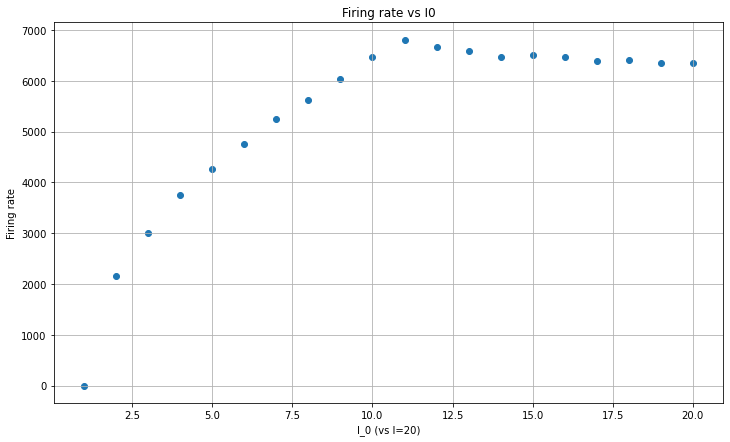

In [284]:


fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(Iclist, spikefreq)
ax.set_xlabel(r'I_0 (vs I=20)')
ax.set_ylabel('Firing rate')
ax.set_title('Firing rate vs I0')
plt.grid()

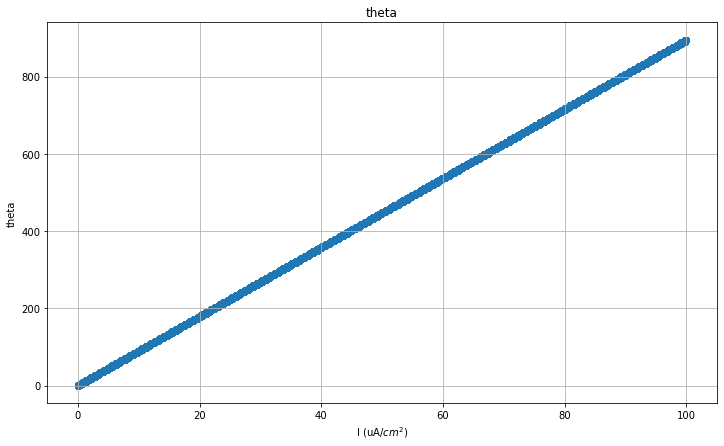

In [270]:
Ic=1
VVV = odeint(solver, 0, T)

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(T, VVV[:,0])
ax.set_xlabel(r'I (uA/$cm^2$)')
ax.set_ylabel('theta')
ax.set_title('theta')
plt.grid()

In [273]:
for i in (VVV[:,0]):
    print (i%3.14)

0.0
0.039995354508756326
0.07996032438983994
0.11986470447438444
0.15967854742556886
0.1993723238797164
0.23891704868611235
0.27828440776533186
0.3174468784337802
0.35637782914017246
0.39505161029885444
0.4334437022410412
0.47153071408175296
0.5092904932391615
0.5467021693160041
0.5837462018526489
0.6204044148801404
0.6566600091918812
0.6924975711091012
0.7279030820254954
0.7628639479967777
0.7973689297875626
0.8314080815498383
0.8649727427890932
0.8980555961050367
0.9306505589973888
0.9627526713648719
0.9943581025570025
1.0254641173618277
1.0560689855064793
1.086171926014286
1.1157730555808285
1.1448733270355116
1.1734744702094475
1.2015789328522446
1.2291898246259687
1.2563108605715942
1.2829463101353924
1.3091009369741275
1.334779951695473
1.3599889820166795
1.3847339968271397
1.4090212751926872
1.4328573952679173
1.4562491467728376
1.4792035182576997
1.50172769346582
1.5238289651050998
1.5455147365228694
1.5667925178096311
1.587669849730402
1.608154315499848
1.6282535325731564
1.64

2.3720903619480254
2.37956306909469
2.3869371080701924
2.394214512181126
2.4013972641805736
2.4084872999682467
2.4154865069858147
2.422396725956535
2.429219752457307
2.4359573381022663
2.44261119174843
2.4491829816963175
2.455674335850002
2.4620868426279614
2.4684220523010367
2.4746814780107442
2.48086659677373
2.486978852002803
2.493019652896166
2.4989903746456257
2.5048923600591273
2.5107269203838847
2.5164953360948665
2.5221988576486503
2.527838706202612
2.5334160742994705
2.5389321265171994
2.544388000084254
2.5497848083111627
2.5551236494394907
2.560405589440343
2.5656316690821797
2.5708029055559436
2.5759202929896965
2.5809848029328073
2.585997384809531
2.590958966342061
2.5958704539430357
2.6007327330775034
2.6055466686600752
2.610313120773796
2.6150329327729267
2.6197069207443207
2.624335883103008
2.628920600945314
2.633461838378178
2.6379603428247833
2.6424168453063963
2.64683206070049
2.651206687975119
2.655541410399543
2.659836899386498
2.6640938295981442
2.6683128506551697


0.5197326849605086
0.5240404753159065
0.5283877071823464
0.532775057283494
0.5372032156316489
0.5416728857426061
0.5461847848505736
0.5507396441230337
0.5553382088756673
0.5599812390085428
0.5646695423744101
0.5694039436678575
0.5741852650561223
0.579014346055224
0.5838920438450894
0.588819233584807
0.5937968087277237
0.5988256813366415
0.6039067823990005
0.6090410621420328
0.6142294903479519
0.6194730566691002
0.624772774474756
0.6301297218611022
0.6355449827286033
0.6410196548774247
0.6465548611107503
0.6521517497497906
0.6578114951487559
0.6635352982098506
0.6693243868982885
0.6751800167572379
0.6811034714704429
0.6870960842046112
0.6931592228195025
0.6992942734036016
0.7055026543523151
0.7117858170060027
0.7181452462880382
0.7245824613429117
0.7310990161742335
0.7376965002828366
0.7443765393047879
0.7511408166333662
0.7579910963378391
0.7649291473806481
0.7719567796804578
0.7790758469890942
0.7862882477772426
0.7935959261201329
0.8010008725832587
0.8085051251080624
0.81611076989759

2.7954940971682407
2.8342529695608607
2.8732610100216607
2.9124920372311283
2.951919152894941
2.991514825274034
3.0312504391698627
3.07109659880707
3.111023663606882
0.011001800380835647
0.051000663246153266
0.09098970720125621
0.1309386205000571
0.17081737719001566
0.2105961237615439
0.2502454378453898
0.28973651871221406
0.3290413021953036
0.36813255997747873
0.4069840516861767
0.4455704042118036
0.48386734342377835
0.521851939375491
0.559502633206403
0.5967988384684695
0.6337212968255237
0.6702523650026784
0.70637593491956
0.7420768744652939
0.7773414552443363
0.812157588879554
0.8465146830233969
0.8804030674051937
0.9138144063189308
0.9467418368657938
0.9791798075959086
1.0111236067128964
1.0425696772823834
1.07351565829941
1.1039602410239517
1.1339028573016314
1.1633438516750623
1.1922844559259964
1.2207266807067576
1.2486731652406
1.2761272043499723
1.3030926938108358
1.3295740600582597
1.3555762369811184
1.3811045780614783
1.4061648012773809
1.4307629597198392
1.454905552937145


2.7668922142358525
2.7705733101127237
2.77422586949109
2.7778503431227364
2.7814471734398154
2.785016794776766
2.788559633590836
2.792076108681428
2.7955666314088603
2.7990316059129015
2.8024714293313053
2.805886492019127
2.809277176502121
2.8126438536826726
2.815986891326176
2.8193066512684766
2.822603489035643
2.825877754004111
2.8291297895596585
2.8323599332556597
2.8355685169706675
2.838755867065771
2.841922304541953
2.8450681451977147
2.8481936997872737
2.851299271402965
2.854385157062353
2.8574516509884376
2.8604990425652517
2.863527616453595
2.866537652705702
2.8695294268790974
2.8725032101498584
2.875459269425477
2.8783978674573376
2.8813192629533546
2.884223710690435
2.8871114613423003
2.8899827592766485
2.8928378462845075
2.8956769609215485
2.898500338088269
2.9013082091144753
2.9041008018430006
2.9068783407130496
2.9096410468428786
2.91238913811236
2.9151228292452345
2.9178423318913786
2.920547854709085
2.92323960263262
2.9259177765535185
2.928582575612623
2.9312341961338575

0.10199349660374368
0.1040070192533773
0.1060220250449544
0.10803859043378283
0.1100567936529484
0.11207671343283154
0.11409842876119969
0.1161220188946328
0.11814756337014787
0.12017514201682333
0.12220483496722467
0.12423672266897201
0.12627088589642144
0.1283074057620337
0.1303463637281408
0.13238784161822936
0.13443192162876416
0.1364786863405567
0.1385282187304182
0.14058060218261348
0.14263592050051388
0.1446942579181365
0.14675569911162656
0.148820329210825
0.15088823412239494
0.15295950145099768
0.1550342182468154
0.15711247192294708
0.15919435042841146
0.16127994226033993
0.16336933647625473
0.16546262270623346
0.16755989116527248
0.16966123266547983
0.1717667386282682
0.17387650109657615
0.1759906127472317
0.1781091669030599
0.18023225754521777
0.18235997932535897
0.18449242757794027
0.18662969833238607
0.18877188832536662
0.19091909501310456
0.19307141658345417
0.19522895196832168
0.19739180212073792
0.19956007340843884
0.20173386891881195
0.20391329204477815
0.2060984470787

0.657911335403647
0.6630439998784614
0.6682308049953538
0.6734727526155742
0.6787708672740469
0.6841261967349301
0.6895398125573782
0.6950128106708253
0.7005463119607573
0.7061414628640894
0.7117994359747759
0.7175214306592541
0.7233086736818923
0.729162419840613
0.7350839526122077
0.7410745848078553
0.7471356623830521
0.7532686065631045
0.7594748506918525
0.7657558493044196
0.7721130917160015
0.7785481028620116
0.785062444152381
0.7916577143383923
0.7983355503935816
0.8050976284073461
0.8119456644924488
0.8188814157055408
0.8259066809810993
0.8330233020787792
0.8402331645440673
0.8475381986823796
0.8549403805462323
0.8624417338285544
0.8700444035066899
0.8777505828488832
0.8855624827400637
0.8934823709090058
0.901512573454831
0.9096554764019023
0.917913527283567
0.9262892367542652
0.9347851802303144
0.9434039995594863
0.952148404718749
0.9610211755412554
0.9700251634711567
0.9791632948717752
0.9884385859115601
0.9978541232044695
1.0074130701122859
1.0171186718458576
1.02697425747099
1

0.10609484537907354
0.10809650361919187
0.11009869909157777
0.11210150818142273
0.11410500737811224
0.11610927328724818
0.11811438264284169
0.12012041231927872
0.12212743934354142
0.12413554090720202
0.1261447943786158
0.12815527725269993
0.13016706614165008
0.1321802384253039
0.13419487207666014
0.13621104529341954
0.1382288365098936
0.14024832440860058
0.1422695879323732
0.144292706295841
0.14631775899756638
0.14834482583161224
0.15037398689947912
0.15240532262187179
0.15443891375052266
0.15647484138001522
0.15851318695957906
0.16055403230497012
0.1625974596100952
0.16464355145911957
0.16669239083800624
0.1687440611464246
0.17079864620968754
0.17285623029031916
0.17491689810010547
0.17698073481171894
0.17904782607074088
0.18111825800717218
0.18319211724759787
0.1852694911661792
0.18735046921012843
0.18943514018674312
0.19152359315152756
0.1936159177337351
0.1957122041483621
0.1978125432083977
0.19991702633721564
0.20202574558051145
0.20413879361886478
0.2062562637796197
0.20837825004

1.2803553939195087
1.3084846449304468
1.3361201607087327
1.363265623862505
1.389925273318683
1.4161038441105251
1.4418065578403532
1.4670390248611245
1.4918071850859196
1.5161172619448013
1.5399758826676209
1.5633900380079258
1.5863667234738745
1.608913048076575
1.6310361841784715
1.652743316443777
1.6740415912550777
1.69493866390542
1.715442492989327
1.7355607086969105
1.7553009222467058
1.7746706966374024
1.7936775540845264
1.8123291319571155
1.830632895290167
1.8485961754081774
1.8662261677739043
1.8835299086510435
1.9005145788618467
1.9171873793489755
1.9335552109577367
1.949624839686921
1.9654028845513967
1.9808958471512614
1.9961102981850178
2.011052583470617
2.0257288886869578
2.0401452554905024
2.0543075755350078
2.068221696356291
2.0818933755177813
2.095328179850016
2.1085315412537984
2.1215087543743625
2.1342649957494206
2.1468053880807947
2.159134907332147
2.17125839048572
2.183180552610283
2.1949059872998493
2.206439282494218
2.217784916475127
2.228947175362295
2.2399302280

2.975958190510232
2.97872617311487
2.9814794713180444
2.9842183051369258
2.9869428869104464
2.9896534107643955
2.992350081229608
2.9950331013784304
2.997702671520818
3.0003589892954547
3.003002249760817
3.0056326454865196
3.008250366644182
3.010855601098802
3.013448534499764
3.0160293503719853
3.018598230207095
3.0211553535537288
3.023700889163228
3.0262350012179464
3.0287578588638606
3.031269629101507
3.033770476851549
3.036260565020916
3.0387400545683985
3.0412091045707594
3.0436678722884434
3.046116513231402
3.048555181225117
3.0509840284763126
3.0534032056389204
3.0558128611033677
3.058213133369099
3.0606041635339576
3.062986093071947
3.0653590618405016
3.0677232081291432
3.0700786687081116
3.072425578877022
3.0747640725134087
3.0770942821215836
3.079416338881037
3.081730372695267
3.084036512240351
3.0863348850135477
3.088625613939632
3.0909088141099286
3.0931846067517537
3.095453112333564
3.097714450170832
3.099968738467913
3.1022160943596813
3.1044566339534523
3.1066904723705644


2.9534303025432207
2.956416725545931
2.9593852275344927
2.9623360855414473
2.965269561675437
2.968185913074204
2.9710853927115393
2.9739682494582196
2.9768347281389635
2.9796850695846713
2.9825195106810822
2.9853382844122605
2.9881416199004986
2.9909297424413905
2.9937028735351516
2.996461230912881
2.9992050306410745
3.001934493507245
3.004649830943843
3.0073512503052013
3.0100389558577474
3.012713148825422
3.015374027433107
3.018021786946643
3.020656619710347
3.0232787151810596
3.025888259960264
3.0284854378224493
3.0310704297410878
3.033643413911771
3.0362045665924127
3.038754067175897
3.041292089212969
3.043818802865256
3.046334375984837
3.0488389741491444
3.0513327606944456
3.053815896747106
3.0562885412526937
3.058750851003775
3.0612029806650964
3.0636450827974597
3.0660773078791506
3.0684998043257776
3.0709127189702583
3.0733162028266277
3.0757104019107357
3.07809545865275
3.080471513700739
3.082838705940513
3.0851971725134133
3.0875470488326853
3.089888468598029
3.09222156380890

1.0098964232720387
1.0185422068773273
1.0273140745085239
1.0362149175953728
1.0452476290967065
1.0544151544730762
1.0637205152110591
1.073166810693578
1.0827572200984146
1.0924950043259964
1.1023835079568012
1.1124261612372375
1.122626482095256
1.1329880781844959
1.1435146489581025
1.1542099877715937
1.1650779840142031
1.1761226252705792
1.18734799951045
1.1987583234666768
1.21035793497532
1.2221512531792764
1.2341428085615571
1.2463372455094368
1.2587393248137455
1.2713539262010154
1.2841860508983696
1.2972408242308116
1.3105234982526777
1.3240394544101828
1.3377942062379584
1.3517934020879916
1.366042827891476
1.3805484099536893
1.3953162177807594
1.4103524273169792
1.425663032052682
1.4412543163880396
1.4571327504815481
1.4733049294495681
1.4897775734812622
1.5065575278746333
1.5236517629950295
1.5410673741545788
1.558811581412669
1.5768917292993474
1.595315286459083
1.614089708961671
1.6332221227310124
1.6527198644440086
1.6725906859616084
1.692842228534459
1.71348205180584
1.73451

0.2383742714234569
0.24042375565975194
0.24247609009350812
0.24453135866182096
0.24658964574203823
0.2486510361642087
0.25071561522347396
0.252783468692233
0.25485468283276136
0.2569293444093188
0.2590075407007686
0.2610893595125714
0.2631748891895751
0.26526421862789507
0.26735743728764705
0.2694546352052254
0.2715559030054675
0.2736613319141594
0.27577101377037083
0.2778850410388469
0.2800035068221729
0.2821265092685832
0.2842541521681352
0.28638653208171094
0.2885237460766672
0.29066589196967074
0.2928130683399428
0.29496537454244676
0.29712291072101893
0.2992857778212721
0.3014540776041241
0.3036279126585879
0.30580738641507255
0.30799260315845745
0.31018366804127995
0.312380687096923
0.314583767252405
0.31679301634202206
0.3190085431200811
0.3212304572742579
0.3234588694386713
0.32569389120690007
0.3279356351453413
0.3301842148061138
0.33243974474035953
0.3347023405112606
0.33697211870728383
0.33924919695519806
0.3415336939333753
0.3438257293846374
0.346125424129728
0.348432900080

3.084539067476407
3.087071727138004
3.0895931857548584
3.0921035878086736
3.094603083682295
3.0970918354165287
3.099570003104156
3.1020377449579764
3.1044952173786777
3.1069425750227646
3.10937997087077
3.111807556294843
3.114225481126959
3.1166338937267932
3.1190329410497606
3.1214227687147735
3.123803521072454
3.1261753412729485
3.128538371333911
3.1308927522084327
3.1332386166989403
3.1355760790252925
3.1379052691813394
0.00022631716394405643
0.0025393516181195785
0.004844499883583264
0.0071418880409139796
0.009431640957879406
0.01171388233582027
0.013988734755636667
0.016256319724456514
0.01851675772167871
0.02077016824518685
0.02301666985790396
0.025256380234006226
0.027489416204966144
0.029715893806107285
0.03193592797408362
0.034149619883814264
0.0363570734808234
0.03855839750395651
0.04075369972901788
0.04294308700065974
0.045126665265067256
0.047304539602075035
0.04947681425734052
0.051643592674801564
0.05380497752884983
0.055961070756617826
0.058111973590265986
0.060257786589

0.800225117102753
0.8056196122255534
0.8110731885238471
0.8165869606909957
0.8221620673809986
0.8277996715998603
0.8335009610965591
0.839267148754073
0.8450994729801784
0.8509991980988167
0.8569676147409502
0.8630060402354736
0.8691158190004677
0.8752983229339413
0.881554951805311
0.887887134269318
0.8942964740678696
0.900784617782461
0.9073531562604678
0.9140037185231455
0.9207379725268772
0.9275576259239648
0.9344644268238773
0.9414601645545537
0.9485466704233096
0.9557258184779136
0.9629995262680615
0.9703697556059985
0.9778385133281069
0.985407867489426
0.9930800651943748
1.0008573314745042
1.0087419177970793
1.0167361306033746
1.0248423323376534
1.0330629424769433
1.0414004385602431
1.049857357218071
1.0584362952017847
1.0671399104129597
1.0759709229331071
1.084932116052824
1.0940263373013415
1.103256594198411
1.1126261337074772
1.1221381053941974
1.1317957293893648
1.1416023063438963
1.1515612189372866
1.1616759333857778
1.1719500009508699
1.1823870594478882
1.1929908347544376
1.

3.006126155422807
3.009240204431082
3.012334425677695
3.015409115313618
3.0184645650640523
3.021501062406914
3.0245188907507004
3.027518329612578
3.0304996547965874
3.0334631385715642
3.036409049849114
3.039337654362045
3.042249214841947
3.045143991197678
3.0480222406931734
3.050884216985084
3.0537301294485264
3.056560195605302
3.059374647803226
3.062173715112694
3.064957623446789
3.0677265956813375
3.070480851774734
3.073220608888052
3.0759460815052098
3.07865748155257
3.081355018519334
3.08403889957731
3.0867093297010246
3.089366511787661
3.0920106467771706
3.0946419331799024
3.0972605405088434
3.0998666421564867
3.1024604217831797
3.1050420606846405
3.1076117378732437
3.110169630159591
3.1127159122344796
3.11525075674996
3.1177743344009645
3.120286814007331
3.122788362594692
3.125279145476556
3.1277593263355374
3.1302290673050965
3.1326885290509967
3.1351378705573456
3.137577231927539
6.75474824385347e-06
0.0024265876335669567
0.0048368774751446075
0.007237769498362301
0.00962940731

1.5265067187084247
1.5523453004622985
1.5777119867898142
1.6026126094984994
1.6270532944022085
1.6510405953680793
1.6745813340113846
1.6976824298044226
1.720350931458234
1.7425939665780907
1.7644187882019429
1.7858331528406444
1.8068446450271045
1.8274608051843648
1.8476891381481328
1.867537075509154
1.887012277720749
1.90612252741247
1.924875332309603
1.9432781041692584
1.9613381334530464
1.9790626167538
1.9964590015358459
2.013534488778169
2.0302961020431445
2.046750726003757
2.062905091222752
2.078765918980344
2.094339954221346
2.109633672705434
2.1246534084007527
2.1394053464006566
2.1538955342194646
2.1681300849433915
2.1821149045715407
2.1958557125624685
2.209358081603546
2.222627433002379
2.235669032076408
2.2484880618153857
2.261089812499768
2.273479297195741
2.2856613867185507
2.2976408263681725
2.3094222355233915
2.3210101072358276
2.332408873293594
2.343622903624669
2.3546564031350163
2.365513468214636
2.3761980881332994
2.3867141462666046
2.3970654229645794
2.40725564341173

0.2676190506951701
0.2696265900913448
0.27163524022975194
0.2736450784024913
0.2756561820887913
0.2776686289666048
0.2796824969248308
0.2816978640753649
0.283714808764866
0.2857334095869777
0.28775374539398113
0.2897758953093006
0.2917999387388721
0.2938259553836491
0.29585402525136884
0.29788422866837605
0.29991664629201464
0.3019513591222238
0.30398844851370255
0.3060279961879604
0.3080700842451978
0.3101147951761294
0.3121622118744898
0.3142124176483452
0.31626549613141774
0.318321531105052
0.3203806070887043
0.32244280908988854
0.3245082225859295
0.3265769335358999
0.32864902839221655
0.3307245941129753
0.3328037181732628
0.3348864885774918
0.33697299387094004
0.33906332315197174
0.34115756608352
0.34325581290508067
0.3453581544448201
0.3474646821310574
0.34957548800442906
0.3516906647297122
0.3538103056074209
0.355934504586084
0.3580633562738984
0.36019695595043855
0.36233539957887784
0.3644787838175847
0.36662720603217336
0.36878076497677226
0.37093956706732056
0.3731037151730692

3.0852601294400444
3.088164085425788
3.0910513483839424
3.0939221665539804
3.0967767849202374
3.0996154453530522
3.102438386146005
3.1052458293850833
3.1080379980666777
3.1108151163591202
3.1135774052125527
3.1163250824606763
3.119058362921592
3.1217774584994373
3.124482578285395
3.1271739286589337
3.1298517133893853
3.1325161337366723
3.1351673884567646
3.1378056661606735
0.00043115337541665966
0.003044038039320629
0.005644505561690938
0.008232738897846037
0.010808918624946262
0.01337322301674293
0.015925828119464303
0.018466907826905743
0.020996633955917776
0.02351517632155309
0.026022702812668275
0.028519370895651708
0.031005334096676496
0.03348075162659869
0.035945780811176054
0.0384005771583138
0.040845294424969314
0.043280084684738984
0.04570509839493342
0.04812048446365269
0.05052639031708894
0.05292296196677215
0.055310344076759055
0.057688680030765216
0.06005811199952449
0.062418781007864244
0.0647708270017806
0.06711438891608212
0.06944960474118078
0.07177661159039461
0.07409

0.3778265168957131
0.3799408141609928
0.3820595600046244
0.3841828487407537
0.38631077537315095
0.38844343560828465
0.3905809258678272
0.39272334330104686
0.39487078579822255
0.3970233520025812
0.39918114132359905
0.40134425394939344
0.4035127908592284
0.40568685383670244
0.4078665454821402
0.4100519692252118
0.41224322933812063
0.41444043094742655
0.4166436800476885
0.41885308351340145
0.42106874911241166
0.42329078867937087
0.4255193233266863
0.42775446662716776
0.42999633244068436
0.43224503573202755
0.43450069258659996
0.436763420227241
0.4390333370303705
0.4413105625428142
0.44359521749760633
0.44588742383104263
0.44818730469882384
0.45049498449231296
0.45281058885547454
0.45513424470044983
0.45746608022495083
0.4598062249280628
0.46215480962661504
0.46451196647212045
0.4668778289666915
0.46925253197963857
0.4716362117640682
0.4740290059730268
0.4764310536759848
0.47884249537543555
0.481263492174723
0.4836942147230201
0.4861348132554366
0.4885854396989697
0.4910462477670916
0.4935

2.6350408899268776
2.6696649094929588
2.7047418278282938
2.7402602208530387
2.776207281917728
2.8125687429803254
2.8493287970204126
2.8864707973658104
2.923976836944981
2.961826972455761
2.999999611230415
3.0384714499736636
3.077217413499121
3.1162113428711753
0.015429173184139167
0.054844547714929526
0.09443001325512856
0.13415739620716582
0.17399778983149705
0.21392150237721186
0.2538983915719024
0.29389783330275865
0.3338887859942412
0.37384093071084923
0.4137247369805488
0.4535103276586421
0.4931682406641409
0.5326695615008754
0.5719861552784602
0.611090726365938
0.649956919327388
0.6885594823806338
0.7268743326902092
0.7648780565366957
0.8025487185804474
0.8398659059834523
0.8768107405649568
0.9133656830809338
0.9495136202626151
0.985239451184321
1.020529710295528
1.055372552071554
1.0897571935259345
1.1236733673226178
1.1571128239724482
1.1900687373594616
1.2225356981788815
1.2545089370367402
1.2859845211398175
1.3169600201675218
1.3474340963711535
1.377406451906432
1.40687724381

1.0097568852268473
1.016413483722244
1.0231538624329182
1.02997971465224
1.0368927714933256
1.0438948025040822
1.0509876671693923
1.0581733941880151
1.065453937336469
1.072831286775267
1.0803074799396604
1.087884602377398
1.0955647885865978
1.1033502228524816
1.11124314008593
1.1192458266596481
1.1273606212468343
1.1355899156580285
1.1439361556787566
1.1524018419071758
1.1609895305912636
1.169701844521382
1.178541787363924
1.1875123360469337
1.1966164053365396
1.205856982270047
1.215237127482323
1.2247599765321815
1.234428741229903
1.2442467109621425
1.254217254020586
1.2643438189267449
1.2746299357598168
1.285079217482275
1.2956953612672755
1.306482149824928
1.3174434527284524
1.3285833436421348
1.3399062307768594
1.351416398916212
1.363118226969545
1.3750162038977982
1.3871149307905575
1.3994191229423172
1.411933611930221
1.4246633476899837
1.437613400593063
1.4507889635236046
1.4641953539547052
1.4778380160258116
1.4917224682379078
1.5058542933823396
1.5202392792088353
1.53488334454

0.40666222763367665
0.40874605583475665
0.41083364244890896
0.4129250764766703
0.41502044746859434
0.417119845536734
0.4192233613652143
0.421331086221715
0.42344311919682065
0.4255595663816103
0.4276805227748519
0.4298060838336988
0.4319363457148193
0.4340714052869026
0.43621136014225437
0.438356308608848
0.44050634976226144
0.4426615834378418
0.444822110242415
0.4469880315665642
0.4491594495959981
0.4513364673245115
0.45351918856478557
0.45570771796112064
0.45790216100148706
0.4601026240288939
0.4623092142537808
0.4645220397658414
0.4667412095461878
0.46896683347906043
0.4711990223638787
0.4734378879271781
0.475683542834775
0.4779361007035896
0.4801956761134698
0.4824623846193554
0.4847363427632154
0.4870176680860987
0.48930647913973013
0.49160289549890246
0.4939070377732997
0.49621902761943426
0.4985389877525841
0.5008670419588435
0.5032033151070601
0.5055479331606585
0.5079010231899184
0.5102627133835704
0.5126331330613021
0.5150124126848987
0.5174006838710903
0.51979807940292
0.522

2.0287242943190966
2.0470910816756094
2.065115839346851
2.082806181952612
2.100169420188883
2.1172126490084855
2.1339427990947177
2.1503666158220147
2.166490638217744
2.182321477937882
2.1978662267105227
2.2131313794939222
2.2281232592669147
2.242848035486765
2.257311715397811
2.271520136017563
2.285479231625806
2.2991948853963384
2.3126726901964565
2.3259181002004032
2.338936427735013
2.3517328401241064
2.364312372338424
2.3766801120569943
2.38884096600703
2.400799676632352
2.4125608631636686
2.424129021492951
2.4355085240457646
2.4467036506721405
2.457718663915677
2.4685576604690658
2.4792246259125994
2.489723442797305
2.5000578921765344
2.5102316551375514
2.5202483465095673
2.5301115055224335
2.539824552495026
2.549390818539343
2.5588135474075733
2.5680958973141577
2.577240942756254
2.586251676333865
2.595131010571783
2.603881790029283
2.6125068344036952
2.621008862495734
2.629390518988891
2.637654382672287
2.64580296856571
2.65383873004476
2.661764060966113
2.669581297792667
2.6772

1.7643112997396706
1.7879445330769208
1.811135224771288
1.8338881290146496
1.8562107755519541
1.8781159104799876
1.8996083029049764
1.9206963378560253
1.9413875275381365
1.9616894388012547
1.981609678779801
2.001155842492249
2.020335498431205
2.0391561762873884
2.057625350527683
2.07575043117593
2.093538756883941
2.1109975790153435
2.1281340621552367
2.1449552685464646
2.161468160579357
2.1776795885486813
2.1935962921187233
2.2092248936047376
2.224571922489286
2.2396437808109617
2.2544467300306046
2.268986897508153
2.283270271714837
2.297302697446849
2.311089871037762
2.3246373838712593
2.3379509067103577
2.351035850730778
2.363897467536372
2.3765408711394507
2.3889710356571463
2.40119279300664
2.413210830602889
2.42502984838789
2.4366545545194462
2.4480893922269438
2.4593386884662145
2.470406655196694
2.4812973899290505
2.4920148762753165
2.502562990941879
2.5129456145266253
2.523166500957796
2.533229277935998
2.5431374791033754
2.55289454583588
2.562503829035659
2.57196859092333
2.58

0.09747050910831989
0.10010694415368038
0.10273060842550352
0.10534168995522508
0.10794037448576477
0.1105268455644084
0.11310128463443947
0.11566387112745291
0.11821478255578244
0.12075419460424586
0.12328228122279983
0.12579921471828515
0.12830516584685414
0.13080030390594333
0.13328478700381696
0.1357587535306668
0.1382223595330463
0.14067576021940953
0.14311910897762958
0.14555255743752626
0.1479762555323707
0.15039035156129943
0.15279499225150106
0.1551903228205167
0.15757648703774452
0.15995362728730855
0.16232188462990438
0.16468139886464472
0.16703230859181462
0.16937475127426227
0.17170886222228932
0.17403476000399154
0.1763525693132526
0.1786624181198424
0.18096443305645993
0.1832587394625027
0.18554546142669937
0.18782472183076537
0.19009664239226298
0.1923613437080296
0.19461894529703772
0.19686956564405067
0.19911332224259626
0.20135033163816773
0.20358070947131113
0.20580457052139467
0.2080220287489003
0.2102331917033955
0.21243816131308835
0.2146370458291078
0.2168299526

0.0769723690643267
0.07979805834412934
0.08260819115088713
0.0854029950251678
0.08818269438058257
0.09094751062474904
0.09369766228082232
0.09643336510891265
0.09915483222750288
0.10186227423463867
0.10455589932968712
0.10723591343407213
0.1099025203134878
0.11255592169840645
0.11519631740629199
0.11782390546244903
0.12043888222144039
0.12304144248884574
0.125631779641997
0.12821008040140702
0.1307764780045253
0.13333113478944858
0.1358742236732886
0.13840591546915482
0.14092637896618987
0.14343578100926413
0.1459342865782154
0.14842205886742965
0.15089925936599036
0.15336604793669073
0.155822582896183
0.15826902109410446
0.16070551799299926
0.16313222774789926
0.16554930328556372
0.1679568963848559
0.1703551577556417
0.17274423711859788
0.17512427723722146
0.17749538655192998
0.17985769689056985
0.1822113441655282
0.1845564628470746
0.1868931860155434
0.18922164541306108
0.19154197149561503
0.19385429348534933
0.19615873942229234
0.19845543621619788
0.20074450969884117
0.2030260846763

0.5059599272577286
0.5080966395510784
0.5102382646138692
0.5123849003769663
0.5145366455317997
0.5166935995427564
0.5188558626612774
0.5210235359373399
0.5231967212336683
0.5253755212377853
0.5275600394749715
0.5297503803219086
0.5319466490186158
0.5341489516818654
0.5363573953183702
0.5385720878368345
0.5407931380619373
0.5430206557463833
0.5452547515839767
0.5474955372230368
0.5497431267908239
0.5519976486458034
0.554259223337064
0.5565279693866585
0.5588040065103512
0.5610874556348988
0.563378438914762
0.5656770797497273
0.5679835028016185
0.570297834011805
0.5726202006183683
0.5749507311729274
0.5772895555579196
0.5796368050038807
0.5819926121066117
0.5843571108441181
0.5867304365938906
0.589112726150185
0.5915041177407345
0.5939047510445987
0.5963147672086477
0.5987343088649566
0.601163520148313
0.6036025467125881
0.6060515357486991
0.6085106360012076
0.6109800052754024
0.6134598404305023
0.6159503079700896
0.6184515698866533
0.6209637901394642
0.6234871346768585
0.626021771460338

2.9796748735502074
2.9845852522972205
2.9894464305312436
2.9942592773912207
2.999024644524466
3.0037433668445015
3.00841626328946
3.013044137580378
3.0176277789790316
3.0221679630464546
3.026665452400776
3.031120997463459
3.035535292056407
3.039909003335252
3.0442428186815373
3.0485374122642366
3.0527934455845394
3.057011568022004
3.0611924173797984
3.065336620429944
3.0694447934590112
3.0735175428135886
3.077555465445867
3.0815591365675896
3.085529079851595
3.089465840967078
3.0933699591707278
3.0972419638550814
3.10108237493108
3.1048917032115337
3.1086704507945893
3.1124191114466253
3.116138170985833
3.1198281076649987
3.123489390679252
3.1271224398651025
3.130727683092628
3.1343055560286626
3.1378564871382064
0.0013808980080924904
0.004879203669288845
0.008351812920223356
0.01179912865010957
0.015221548161135079
0.018619463492355326
0.021993261741995784
0.025343325390777327
0.028670032624900532
0.03197375765868893
0.035254871058141735
0.03851372070680137
0.04175057163381135
0.04496

1.1608377762340063
1.1679187810092793
1.175092448083364
1.1823607150137598
1.1897255649994798
1.197189027670151
1.2047531798747735
1.2124201464716173
1.2201921011165262
1.2280712670529277
1.2360599179007061
1.2441603784451893
1.25237502542659
1.2607062883288784
1.2691566501694518
1.2777286482876655
1.2864248751346161
1.2952480701177813
1.3042013684304714
1.313287712393207
1.3225100819261564
1.3318715327366584
1.3413751978222757
1.3510242889741897
1.360822098280709
1.3707719996294139
1.3808774502115733
1.3911419920244037
1.4015692533745772
1.4121629503811612
1.4229268884791275
1.4338650257115426
1.4449815526983678
1.4562806298543358
1.4677665115363419
1.4794435569343016
1.4913162319139013
1.503389110860598
1.5156668785215737
1.5281543318492816
1.5408563818441956
1.5537780553982423
1.5669244971374376
1.5803009712645228
1.5939128634031925
1.6077656908852753
1.621865107198277
1.6362168806627317
1.6508269088323453
1.6657012207070232
1.680845978609954
1.6962674800657163
1.7119721596767925
1.

0.41099238096685253
0.4129959434462971
0.41499879965285613
0.4170010278231966
0.4190027062760673
0.4210039134308299
0.4230047278249667
0.4250052281330663
0.42700549318444514
0.4290056019815647
0.43100563371788025
0.4330056570338665
0.43500573074097515
0.4370059304311762
0.439006332057168
0.4410070116292881
0.44300804522881476
0.4450095090206996
0.44701147926766494
0.4490140323430505
0.4510172447435461
0.4530211931037438
0.4550259542079611
0.45703160500467943
0.4590382226190495
0.4610458843665337
0.46305466776609405
0.46506465055337953
0.46707591069414134
0.4690885263973068
0.47110257612828077
0.4731181386224743
0.47513529289826506
0.4771541182704122
0.4791746943632442
0.4811971011239602
0.48322141883593117
0.4852477281318879
0.48727611000722204
0.4893066455108719
0.4913394098525923
0.49337448171049614
0.495411942409667
0.4974518736352347
0.4994943574448807
0.501539476280207
0.5035873129783321
0.5056379507843967
0.5076914733622497
0.5097479648070684
0.5118075096566126
0.5138701929032758

2.2323112384091353
2.2490889177012257
2.26555935519799
2.281729894250372
2.297607764926976
2.3131981143656155
2.32850685383222
2.3435405529148845
2.35830578120159
2.3728091082805456
2.387057103739618
2.4010562868480854
2.4148109928434103
2.428325959991536
2.441606887906243
2.454659476200856
2.4674894244890417
2.480102432384353
2.4924918633306667
2.504691809394682
2.516685719334884
2.528479102013204
2.540077345146198
2.5514857153041355
2.562709357911796
2.573753297248242
2.5846215108745234
2.5953173520333728
2.6058448375980667
2.6162078059122784
2.6264099160001813
2.6364546475659942
2.646345300993868
2.656084997347886
2.6656766783726304
2.6751232332560555
2.6844287211411135
2.693596528570094
2.7026296562937766
2.7115310055585375
2.7203033781055517
2.7289494761715893
2.737471902488334
2.7458732417253593
2.754156395479651
2.7623239431676545
2.7703783389016614
2.778321962521101
2.786157119592769
2.793886041410712
2.801510884996457
2.8090338075636616
2.8164570881230127
2.82378279550802
2.83

In [30]:
a=0.02
b=-0.1
c=-55
d=6
V=-77.1107
u=7.711
VV=[]
uu=[]
tmin=0
timestep=0.01
tmax=200
I=0

while tmin<(tmax-timestep):
    I+=.05
    V = V + timestep*(0.04*V**2+5*V+140-u+I)
    u = u + timestep*a*(b*V-u)
    if V>30:
        VV.append(30)
        V=c
        u=u+d
        print (I)
        I=0
    else:
        VV.append(V)
    uu.append(u)
    tmin+=timestep







42.69999999999971
47.749999999999424
51.799999999999194
54.99999999999901
57.399999999998876
59.199999999998774
60.5499999999987
61.54999999999864
62.2999999999986
62.79999999999857
63.199999999998546
63.44999999999853
63.64999999999852
63.79999999999851
63.899999999998506
63.9999999999985


Text(0.5, 0, 'Time')

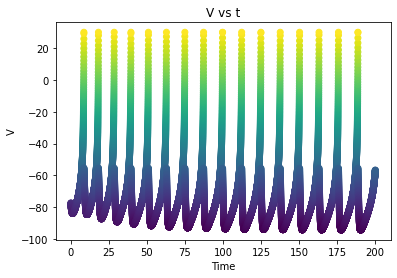

In [31]:
import math
import matplotlib.pyplot as plt
import numpy as np
T=np.linspace(0, 200, 20000)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(T, VV, c=VV)
ax.set_title("V vs t")
ax.set_ylabel('V')
ax.set_xlabel('Time')